
# Práctica 1: Metaheurísticas basadas en trayectorias: Temple Simulado

<center><h3>
    Diego Barreiro Pérez
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_TempleSimulado.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_TempleSimulado.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_TempleSimulado.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.


## Preliminares adicionales sobre Python para esta práctica


Además de lo visto en la P0, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte especialmente útiles más adelante en la realización de esta práctica.


Por ejemplo, puedes generar números aletorios de la siguiente forma utilizando el paquete `random`.

In [1]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)
print (numero_U)

10
0.09006873436266771


Puedes generar vectores de números fijos y aleatorios que a su vez estén barajados de manera aleatoria como se ilustra a continuación.

In [2]:
vector = [x for x in range (1,10)]
print("vector fijo", vector)

random.shuffle(vector)
print(vector)

vector_aleatorio = [random.randint(1, 10) for i in range(1,10)]
print("vector aleatorio", vector_aleatorio)

random.shuffle(vector_aleatorio)
print(vector_aleatorio)

vector fijo [1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 2, 4, 5, 8, 9, 1, 7, 6]
vector aleatorio [2, 9, 3, 3, 2, 4, 8, 6, 6]
[8, 3, 2, 6, 4, 3, 6, 2, 9]


Otro conjunto de funciones importantes son las que vienen del módulo `math`. Puedes encontrar una lista de la funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos algunos ejemplos de uso.

In [3]:
import math 

# número e elevado a la potencia indicada
e = math.exp(1)
print(e)

power2_e = math.exp(2)
print(power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))

2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, funciones del módulo `time` te permitirían obtener de manera aproximada tiempos de ejecución de secciones concretas de código. 

In [4]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.15393567085266113 segundos ----


## El Problema del Viajante de Comercio (VC) con Temple Simulado

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Enfriamiento o Temple Simulado (SA, del inglés Simulated Annealing). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.


Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la fórmula del semiverseno https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno, que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [5]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [6]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

In [7]:
g1 = Localizaciones(filename='./data/grafo8cidades.txt')
print(g1.distancia(0,1))
g2 = Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print(g2.distancia(0,1))

55.88273580792048
119.30959564041359


El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


## P1.1: Implementación básica de Temple Simulado



Implementa el algoritmo básico de Temple Simulado para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva (Véase el T1, diapositiva 37 y asociadas).

Ten en cuenta las siguientes consideraciones de diseño para completar la implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones)  comenzando y finalizando en la ciudad 0. 

- Solución inicial: generación aleatoria de una permutación válida.

- Operador  de  selección  de  la  solución  siguiente  Scand  a  partir  de  la  actual  Sact:  operador  de  intercambio. 

- Función de coste: suma de las distancias del camino según el orden del recorrido.

- Mecanismo de enfriamiento: mecanismo exponencial decreciente que sigue la expressión 𝑇(𝑘)=T0·𝑒(−𝜆𝑘), donde 𝑘 es el número de iteración y T0, λ son los parámetros de diseño.

    Para esta implementación básica considera, 𝑇(𝑘) = 20 · 𝑒(−0.0045𝑘), para establecer los parámetros por defecto de T0 y 𝜆, con temperatura inicial fija T0=20 y 𝜆=0.0045 respectivamente.

- Condición de parada: número fijo de iteraciones (limite=1000). No se precisa definir Tfinal.

Para verificar tu implementación, puedes utilizar el fichero de localizaciones de 8 ciudades gallegas (*grafo8cidades.txt*). La solución óptima resuelta con una búsqueda informada como A* se situa en torno a los 382km.

Para comprobar que tu implementación es suficientemente general como para manejar problemas del VC diferentes tallas, puedes probar también con el fichero de localizaciones de 120 ciudades de USA proporcionado en esta práctica (*US120.txt*).


In [8]:
# REPRESENTACIÓN DE LAS SOLUCIONES
# En este diseño, a pesar de que siempre se empieza en la ciudad 0 y se acaba en la ciudad 0, se
# procede a almacenar todo el orden de las ciudades, incluyendo las iniciales y las finales, para
# facilitar ciertas funciones como coste.
# [0, 1, 2, 3, 4, 5, 6, 7, 0]

In [9]:
# SOLUCIÓN INICIAL
def genera_solucion_inicial(loc):
    sol = [x for x in range(1, loc.nciudades)]
    random.shuffle(sol)
    return [0] + sol + [0]

In [10]:
# OPERADOR DE SELECCIÓN DE LA SOLUCIÓN SIGUIENTE
def selecciona_solucion_siguiente(loc, sact):
    pos_cambio = random.randint(1, loc.nciudades-1)
    pos_opuesto = pos_cambio
    while pos_opuesto == pos_cambio:
        pos_opuesto = random.randint(1, loc.nciudades-1)
    
    scand = sact.copy()
    scand[pos_cambio], scand[pos_opuesto] = sact[pos_opuesto], sact[pos_cambio]
    return scand

In [11]:
# FUNCIÓN DE COSTE
def coste(loc, sol):
    s = 0
    for i in range(0, len(sol)-1):
        s += loc.distancia(sol[i], sol[i+1])
    return s

In [12]:
# MECANISMO DE ENFRIAMIENTO
t0, l = 20, 0.0045

# Se pasan todos estos parámetros "no útiles" para poder mantener la misma función
# de temple_simulado más adelante al definir un valor de T0 dinámico.
T0 = lambda loc, prob, empeorar, sol_inicial: t0

def T(k):
    return 20 * math.exp(-l*k)

In [13]:
# CONDICIÓN DE PARADA
limite = 1000

In [14]:
# TEMPLE SIMULADO

DEFAULT_PROB = 0.5
DEFAULT_EMPEORAR = 0.01

def temple_simulado(loc, prob=DEFAULT_PROB, empeorar=DEFAULT_EMPEORAR):
    sact = genera_solucion_inicial(loc)
    # Aparte de la solución actual, se almacenará también la mejor solución visitada
    # ya que es posible que al tomar una solución peor nunca se vuelva a una mejor
    sfin = sact
    t = T0(loc, prob, empeorar, sact)
    for i in range(0, limite):
        scand = selecciona_solucion_siguiente(loc, sact)
        o = coste(loc, scand) - coste(loc, sact)
        # Se inverte el orden de las condiciones (primero si es mejor, luego la "agitación")
        # ya que el cálculo de si es mejor es más sencillo
        if o < 0 or random.uniform(0, 1) < math.exp(-o/t):
            sact = scand
        # Si se selecciona sact = scand porque el coste es menor, entonces se almacena
        # esta solución como mejor solución
        if o < 0:
            sfin = sact

        t = T(i)
    return sfin

In [15]:
sol = temple_simulado(g1)
print(coste(g1, sol), sol)
# Las soluciones "óptimas" que salen son [0, 1, 2, 3, 4, 5, 6, 7, 0] y [0, 7, 6, 5, 4, 3, 2, 1, 0]

g3=Localizaciones(filename='./data/US120.txt')
sol = temple_simulado(g3)
print(coste(g3, sol), sol)

381.6699617675482 [0, 7, 6, 5, 4, 3, 2, 1, 0]
78968.88488761125 [0, 107, 22, 106, 118, 116, 15, 8, 114, 68, 74, 75, 70, 20, 9, 73, 31, 95, 33, 48, 64, 50, 94, 37, 18, 113, 47, 49, 86, 12, 67, 5, 29, 3, 19, 60, 27, 28, 66, 98, 88, 46, 104, 108, 30, 39, 115, 32, 10, 16, 53, 55, 84, 71, 111, 7, 36, 91, 119, 40, 38, 45, 76, 6, 102, 44, 35, 89, 59, 99, 56, 1, 61, 92, 96, 103, 52, 42, 105, 82, 69, 79, 83, 14, 24, 11, 58, 2, 101, 81, 100, 77, 109, 13, 110, 43, 90, 78, 80, 51, 57, 97, 85, 87, 112, 54, 72, 34, 23, 26, 63, 62, 21, 41, 117, 25, 17, 65, 93, 4, 0]


❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

**💬 Respuesta.** Está comentado en el código. Las celdas inmediatamente superiores son las que definen el algoritmo (hay una para cada función.

❓ **Pregunta 2**. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.

Notas: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

**💬 Respuesta.** En la siguiente celda, se define una función de prueba que, recibiendo un grafo y un número de iteraciones, generará un gráfico de distribución para el número de pruebas indicado.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def prueba(g=g1, tests=100, prob=DEFAULT_PROB, empeorar=DEFAULT_EMPEORAR, plt=plt):
    results = [coste(g, temple_simulado(g, prob=prob, empeorar=empeorar)) for i in range(0, tests)]
    v_max, v_min = mpatches.Patch(color=None, label='MAX: ' + str(max(results))), mpatches.Patch(label='MIN: ' + str(min(results)))
    plt.legend(handles=[v_max, v_min])
    plt.hist(results, bins=10)
    try: plt.show()
    except AttributeError: pass

# Se define además una función que dibuja en un gráfico las ciudades y los caminos
def visualizar(loc, sol, plt=plt):
    for i in range(0, loc.nciudades):
        ciudad = loc.tablaciudades[i][::-1]
        plt.plot(ciudad[0], ciudad[1], "or")
    for i in range(0, len(sol)-1):
        c1 = loc.tablaciudades[sol[i]][::-1]
        c2 = loc.tablaciudades[sol[i+1]][::-1]
        plt.plot([c1[0], c2[0]], [c1[1], c2[1]], 'k-', lw=2)
    try: plt.show()
    except AttributeError: pass

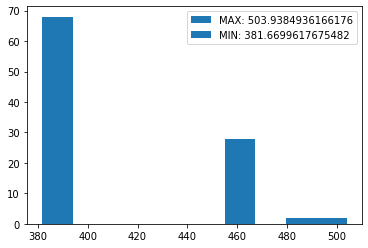

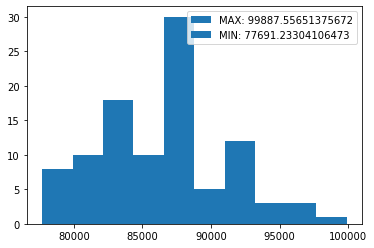

In [17]:
prueba(g1)
prueba(g3)

### Ajuste de temperatura inicial dinámico

En tu implementación has establecido la temperatura inicial siguiendo un valor fijo completamente arbitrario. Esto puede no resultar siempre adecuado, y suele ser más conveniente disponer de un ajuste de la temperatura inicial (T0) que tenga en cuenta la instancia del problema a resolver. 

Modifica la implementación anterior para que puedas parametrizar el valor inicial del parámetro de control T0 utilizando la siguiente fórmula:

    𝑇0 = −𝜇/ln(𝜙)𝐶(𝑆0), que permite aceptar (con una probabilidad 𝜙) soluciones siguientes que empeoren en μ (tanto por uno) a S0 (esto es, que sean (1+ μ) veces peores).

En la fórmula, C(S0) es el coste de la solución inicial, con 𝜙=0.50 y 𝜇=0.01.

In [18]:
# NUEVO MECANISMO DE ENFRIAMIENTO
T0 = lambda loc, prob, empeorar, sol_inicial: -empeorar/math.log(prob)*coste(loc, sol_inicial)

In [19]:
# Se define una función auxiliar para imprimir tanto el gráfico
# de distribución de las soluciones como el mapa con el trayecto
# de la solución.
def prueba_completa(loc):
    sol = temple_simulado(loc)
    print(coste(loc, sol), sol)
    fig, (plt1, plt2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    visualizar(loc, sol, plt=plt1)
    prueba(loc, plt=plt2)
    plt.show()

466.2946852391608 [0, 6, 7, 1, 2, 3, 4, 5, 0]


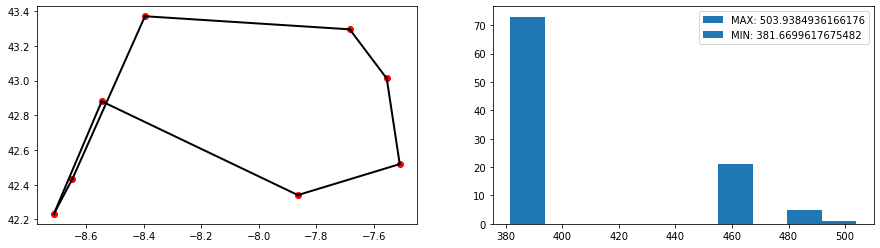

84846.02137499044 [0, 37, 64, 117, 52, 21, 81, 22, 89, 91, 8, 16, 115, 106, 15, 7, 96, 72, 5, 118, 53, 50, 59, 23, 73, 3, 18, 66, 51, 79, 84, 20, 75, 55, 4, 95, 87, 76, 6, 30, 111, 97, 57, 67, 61, 65, 56, 32, 90, 101, 68, 40, 105, 104, 46, 45, 39, 70, 49, 25, 98, 83, 119, 71, 74, 24, 58, 42, 35, 82, 69, 77, 78, 109, 2, 113, 94, 114, 107, 80, 10, 100, 43, 44, 102, 1, 27, 86, 47, 54, 112, 85, 108, 48, 33, 9, 34, 38, 12, 116, 29, 19, 31, 88, 17, 60, 28, 93, 36, 14, 11, 62, 63, 103, 92, 26, 41, 99, 110, 13, 0]


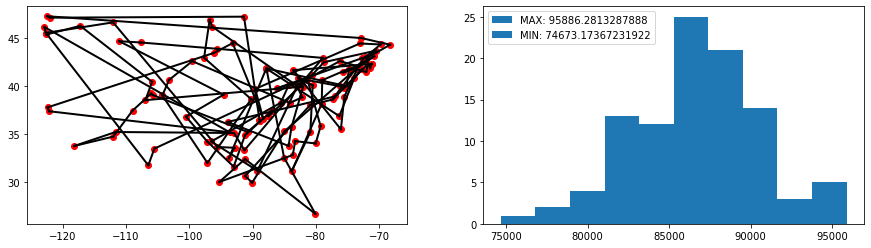

In [20]:
prueba_completa(g1)
prueba_completa(g3)

❓ **Pregunta 3**. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, de manera razonada amplia la tabla con variaciones de 𝜙 y 𝜇 para uno de los problemas. ¿Qué combinación da mayor/menor T0?

**💬 Respuesta.** Tal como se puede ver en las siguientes tablas, se obtiene una menor temperatura T0 cuanto menor sean los valores de probabilidad y empeoramiento (en este caso, probabilidad `0.1` y empeoramiento `0.01`). Por el contrario, la T0 es mayor cuando se dan valores más altos (`0.9` y `0.5`, respectivamente).
Sin embargo, se aprecia más aumento cuando se incrementa el empeoramiento que cuando se incrementa la probabilidad. Se ve claramente con las diferencias entre `P_0.1` y `P_0.5` con `E_0.1` constante, y entre `E_0.1` y `E_0.5` con `P_0.1` constante.

In [21]:
import pandas as pd

# Parámetros a probar
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
empeorars = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

# Función que genera un dataframe para mostrar una tabla por pantalla
def relacion_p3(loc):
    # Se genera la misma solución inicial para todas las combinaciones
    sol_inicial = genera_solucion_inicial(loc)
    out_prob = []
    for prob in probs:
        out_empeorar = []
        for empeorar in empeorars:
            # Para cada combinación de probabilidad-empeorar, se almacena la temperatura inicial obtenida
            out_empeorar.append(T0(loc, prob, empeorar, sol_inicial))
        out_prob.append(out_empeorar)
    # Se devuelve el datagrame confeccionado
    return pd.DataFrame(out_prob, columns=["E_" + str(e) for e in empeorars], index=["P_" + str(p) for p in probs])

In [22]:
# Ciudades Gallegas
relacion_p3(g1)

,E_0.01,E_0.02,E_0.05,E_0.1,E_0.2,E_0.5
P_0.1,3.477905,6.955809,17.389523,34.779045,69.558091,173.895227
P_0.2,4.975756,9.951513,24.878782,49.757565,99.515130,248.787824
P_0.3,6.651455,13.302910,33.257276,66.514552,133.029103,332.572758
P_0.4,8.739771,17.479542,43.698855,87.397710,174.795419,436.988548
P_0.5,11.553349,23.106698,57.766744,115.533488,231.066976,577.667439
P_0.6,15.676917,31.353835,78.384587,156.769174,313.538349,783.845872
P_0.7,22.452295,44.904590,112.261476,224.522952,449.045904,1122.614760
P_0.8,35.887979,71.775958,179.439896,358.879792,717.759584,1794.398961
P_0.9,76.007327,152.014653,380.036633,760.073267,1520.146534,3800.366334


In [23]:
# Ciudades USA
relacion_p3(g3)

,E_0.01,E_0.02,E_0.05,E_0.1,E_0.2,E_0.5
P_0.1,859.718874,1719.437749,4298.594371,8597.188743,17194.377486,42985.943715
P_0.2,1229.979640,2459.959280,6149.898200,12299.796400,24599.592800,61498.982000
P_0.3,1644.203139,3288.406278,8221.015695,16442.031390,32884.062780,82210.156949
P_0.4,2160.423319,4320.846638,10802.116595,21604.233190,43208.466380,108021.165950
P_0.5,2855.924282,5711.848564,14279.621411,28559.242822,57118.485645,142796.214112
P_0.6,3875.247779,7750.495559,19376.238897,38752.477793,77504.955587,193762.388967
P_0.7,5550.083901,11100.167801,27750.419503,55500.839007,111001.678013,277504.195033
P_0.8,8871.311102,17742.622204,44356.555510,88713.111021,177426.222041,443565.555103
P_0.9,18788.593163,37577.186326,93942.965814,187885.931629,375771.863257,939429.658144


❓ **Pregunta 4**. Escoge 5 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.

**💬 Respuesta.** Tal como se puede apreciar en las siguientes celdas, el resultado para el caso de las ciudades gallegas no varía mucho para unas combinaciones u otras. Siempre se obtiene el mismo resultado mínimo.
Sin embargo, para el problema de las ciudades de Estados Unidos si que se observan diferencias en la distribución de las soluciones obtenidas. Cuando el empeoramiento es muy alto, se obtienen resultados peores, posiblemente porque "acepta" soluciones demasiado malas con frecuencia, y debido al alto número de iteraciones, nunca se consiga llegar a alguna óptima. Para el parámetro de la probabilidad, se obtiene un mejor resultado con menores valores. La distribución se acerca más hacia los mínimos cuanto más baja es la probabilidad.  
En cuanto a la combinación "neutral" probada, se obtienen resultados aceptables, pero viendo los otros resultados quizás sería más óptimo bajar la probabilidad más todavía.

In [24]:
combinaciones = [[0.1, 0.01], [0.1, 0.5], [0.9, 0.01], [0.9, 0.5], [0.4, 0.05]]

# Función que ejecuta, para cada combinación, 
def relacion_p3_sols(loc):
    for comb in combinaciones:
        prob, empeorar = comb
        print("PROB=" + str(prob), "EMPEORAR=" + str(empeorar))
        prueba(loc, prob=prob, empeorar=empeorar)

PROB=0.1 EMPEORAR=0.01


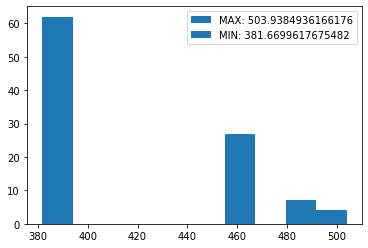

PROB=0.1 EMPEORAR=0.5


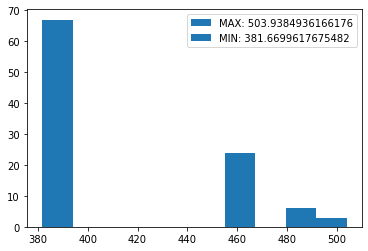

PROB=0.9 EMPEORAR=0.01


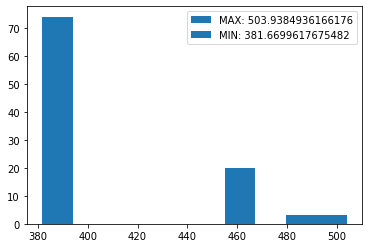

PROB=0.9 EMPEORAR=0.5


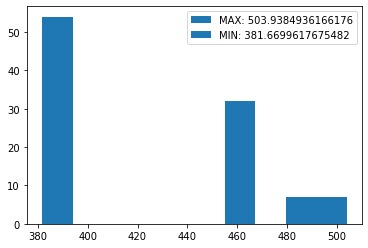

PROB=0.4 EMPEORAR=0.05


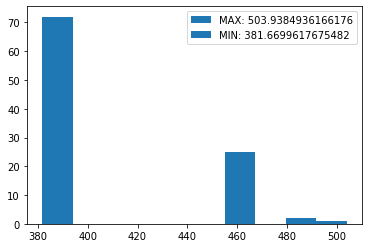

In [25]:
# Ciudades Gallegas
relacion_p3_sols(g1)

PROB=0.1 EMPEORAR=0.01


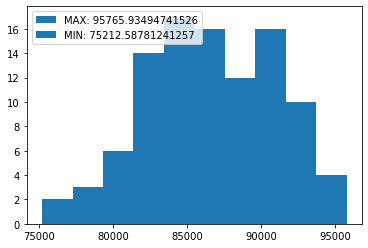

PROB=0.1 EMPEORAR=0.5


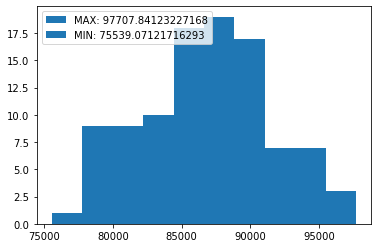

PROB=0.9 EMPEORAR=0.01


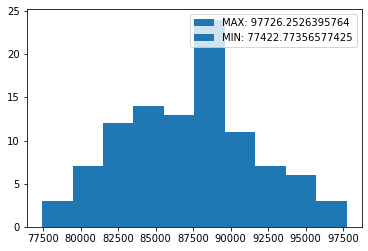

PROB=0.9 EMPEORAR=0.5


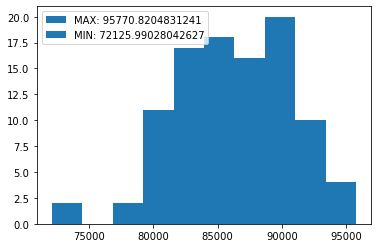

PROB=0.4 EMPEORAR=0.05


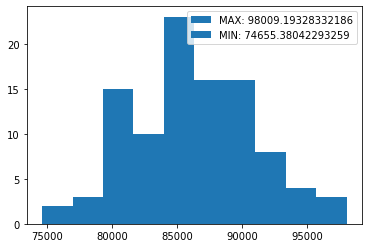

In [26]:
# Ciudades USA
relacion_p3_sols(g3)

 
## P1.2: Mejoras del algoritmo de Temple Simulado (No obligatorio)

En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- La solución inicial
- El valor inicial del parámetro de control (T0).
- El mecanismo de enfriamiento.
- La velocidad de enfriamiento.
- El mecanismo de selección de las soluciones candidatas
- El criterio de parada

> **NOTA:** Se prueba sólo con el grafo de las ciudades de USA ya que, al ser más complejo, permite obtener y apreciar mejor las variaciones. _Las explicaciones están tras los bloques de código, donde la pregunta._

26899.455106219197 [0, 91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 51, 79, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 26, 55, 21, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 28, 0]


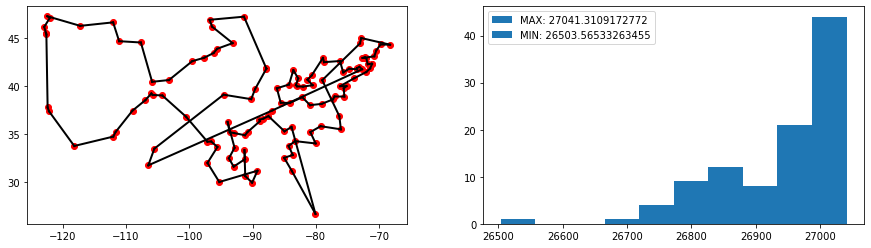

In [27]:
# SOLUCIÓN INICIAL
# Se prueba ahora a partir de la mejor solución posible por búsqueda
# local.

genera_solucion_inicial_legacy = genera_solucion_inicial

def genera_solucion_inicial_mejorada(loc):
    sol = [0]
    for i in range(1, loc.nciudades):
        mejor_punto, mejor_coste = None, None
        for i in range(1, loc.nciudades):
            if i in sol:
                continue
            c = loc.distancia(sol[len(sol) - 1], i)
            if not mejor_punto or c < mejor_coste:
                mejor_punto, mejor_coste = i, c
        sol.append(mejor_punto)
    return sol + [0]

genera_solucion_inicial = genera_solucion_inicial_mejorada
prueba_completa(g3)

genera_solucion_inicial = genera_solucion_inicial_legacy

187954.84568795378 [0, 39, 8, 27, 74, 73, 94, 79, 87, 82, 71, 119, 45, 68, 83, 88, 93, 59, 34, 26, 48, 69, 13, 78, 18, 63, 76, 118, 75, 46, 117, 16, 84, 114, 115, 95, 7, 36, 25, 90, 42, 72, 21, 52, 96, 99, 97, 65, 5, 111, 49, 112, 61, 109, 85, 86, 66, 57, 20, 103, 116, 15, 70, 10, 56, 113, 38, 100, 1, 6, 41, 108, 32, 102, 107, 12, 19, 40, 43, 89, 110, 53, 23, 105, 98, 35, 9, 55, 37, 77, 3, 28, 92, 50, 58, 24, 62, 67, 51, 81, 29, 30, 11, 80, 54, 106, 64, 47, 91, 22, 33, 17, 2, 44, 104, 4, 31, 14, 60, 101, 0]


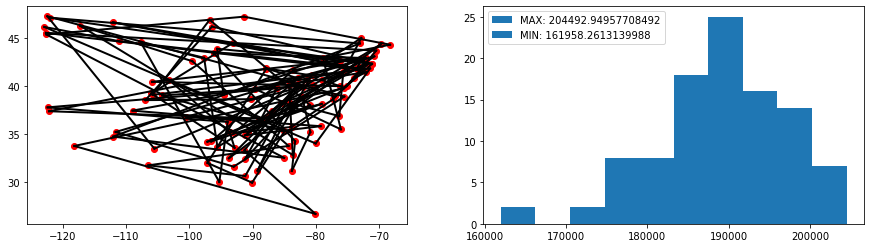

In [28]:
# OPERADOR DE SELECCIÓN DE LA SOLUCIÓN SIGUIENTE
# Se busca la ciudad con mayor coste, y se intercambia por la que tenga
# menor coste en esa posición.

selecciona_solucion_siguiente_legacy = selecciona_solucion_siguiente

def selecciona_solucion_siguiente_mejorada(loc, sact):
    ciudad_larga, coste_largo = None, None
    # Localizar el trayecto más largo
    for i in range(1, loc.nciudades):
        c = loc.distancia(sact[i], sact[i+1])
        if not ciudad_larga or c > coste_largo:
            ciudad_larga, coste_largo = sact[i], c
    
    # Para la ciudad con el trayecto más largo, localizar el trayecto
    # más corto
    ciudad_corta, coste_corto = None, None
    for i in range(1, loc.nciudades):
        if i == ciudad_larga:
            continue
        c = loc.distancia(ciudad_larga, i)
        if not ciudad_corta or c < coste_corto:
            ciudad_corta, coste_corto = i, c
    indice_largo, indice_corto = sact.index(ciudad_larga), sact.index(ciudad_corta)

    scand = sact.copy()
    scand[indice_largo], scand[indice_corto] = sact[indice_corto], sact[indice_largo]
    return scand

selecciona_solucion_siguiente = selecciona_solucion_siguiente_mejorada
prueba_completa(g3)

selecciona_solucion_siguiente = selecciona_solucion_siguiente_legacy

56894.074980840924 [0, 78, 70, 88, 103, 52, 63, 64, 37, 84, 105, 40, 10, 22, 68, 100, 90, 43, 1, 102, 44, 76, 39, 7, 66, 18, 59, 8, 32, 101, 51, 77, 79, 53, 21, 73, 54, 112, 33, 108, 48, 97, 57, 29, 116, 67, 19, 9, 117, 23, 41, 24, 26, 110, 2, 71, 106, 45, 6, 30, 72, 5, 94, 36, 42, 4, 16, 35, 61, 115, 12, 98, 99, 56, 3, 82, 89, 69, 113, 75, 62, 58, 55, 11, 14, 74, 83, 13, 119, 107, 114, 80, 38, 93, 47, 111, 20, 118, 15, 87, 95, 31, 86, 65, 28, 27, 60, 49, 34, 92, 17, 85, 104, 46, 96, 25, 50, 81, 109, 91, 0]


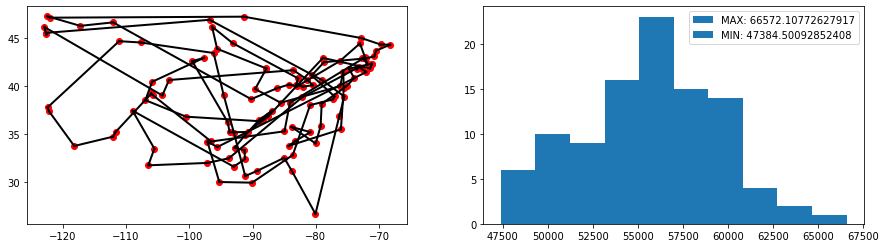

In [29]:
# VELOCIDAD DE ENFRIAMIENTO
# Dentro de cada iteración, se sigue explorando hasta encontrar 10 vecinos o 1 mejor

temple_simulado_legacy = temple_simulado

DEFAULT_MAX_VECINOS = 10
def temple_simulado_mejorado(loc, prob=DEFAULT_PROB, empeorar=DEFAULT_EMPEORAR,
                             max_vecinos=DEFAULT_MAX_VECINOS, max_exitos=DEFAULT_MAX_VECINOS*0.1):
    sact = genera_solucion_inicial(loc)
    sfin = sact
    t = T0(loc, prob, empeorar, sact)
    for i in range(0, limite):
        # Para cada iteración, se almacena un número de vecinos y vecinos aceptados
        # como condición de para en el segundo bucle
        vecinos, exitos = 0, 0
        while vecinos < max_vecinos and exitos < max_exitos:
            scand = selecciona_solucion_siguiente(loc, sact)
            vecinos += 1
            o = coste(loc, scand) - coste(loc, sact)
            if o < 0 or random.uniform(0, 1) < math.exp(-o/t):
                sact = scand
                exitos += 1
            if o < 0:
                sfin = sact

        t = T(i)
    return sfin

temple_simulado = temple_simulado_mejorado
prueba_completa(g3)

temple_simulado = temple_simulado_legacy

381.6699617675482 [0, 7, 6, 5, 4, 3, 2, 1, 0]


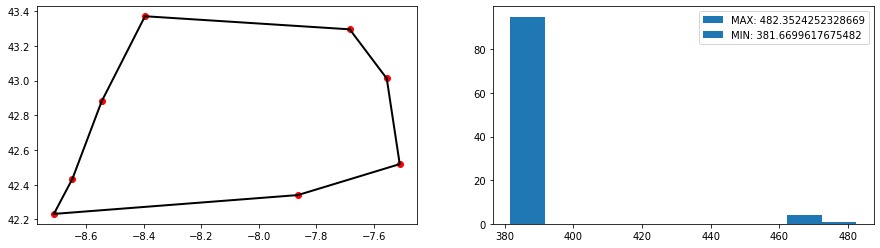

26617.751316184167 [0, 91, 81, 109, 119, 89, 71, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 82, 69, 83, 13, 78, 80, 114, 107, 77, 51, 101, 79, 10, 22, 68, 100, 90, 43, 32, 8, 110, 113, 14, 11, 58, 62, 75, 63, 26, 24, 41, 55, 28, 93, 65, 27, 86, 47, 60, 9, 20, 111, 49, 25, 17, 92, 34, 23, 52, 117, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 44, 102, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 21, 0]


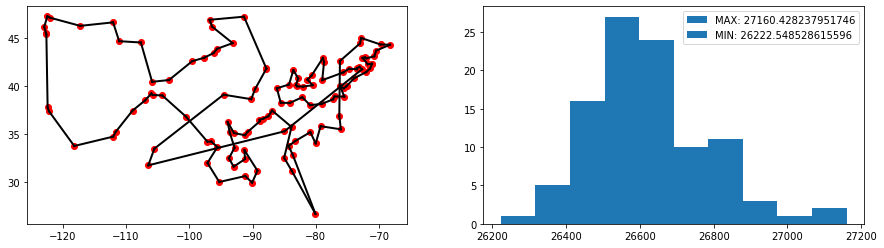

In [30]:
# SOL_INICIAL + VEL_ENFRIA
genera_solucion_inicial = genera_solucion_inicial_mejorada
temple_simulado = temple_simulado_mejorado

prueba_completa(g1)
prueba_completa(g3)

genera_solucion_inicial = genera_solucion_inicial_legacy
temple_simulado = temple_simulado_legacy

❓ **Pregunta 5**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.

**💬 Respuesta.** Se ha probado a realizar tres modificaciones:
* la solución inicial siendo la mejor solución por búsqueda local (en vez de totalmente aleatoria),
* la solución siguiente cambiando la ciudad que tenga un recorrido más largo con la siguiente por la que sea más corta,
* y realizar una exploración más exhaustiva del entorno.

Tal como se puede ver en los resultados, para la solución inicial se aprecia una sustancial mejora, pasando de los cerca de 80k de coste original a menos de 30k. Para el segundo cambio, la mejora no existe, sino que además empeora el resultado, por lo que esta optimización "se descarta". Además, si se aplican las dos a la vez, se puede ver como no se obtienen soluciones mejores, ya que este cambio es sinónimo de búsqueda local, por lo que siempre se mantiene en la misma solución.  
En cuanto al tercer cambio, se aprecia una mejora sustancial de los resultados frente al resultado original. Esto se debe a que se explora con más profundidad el entorno, en el sentido de que se sigue buscando hasta obtener 10 vecinos o 1 vecino exitoso. Si se aplica esta mejora junto con la primera, se obtiene una mejora todavía mayor.

**Por lo tanto, se puede afirmar que partiendo de una solución localmente óptima, se ha mejorado sustancialmente el temple simulado.** Se podría afirmar además, que es muy importante la selección de la solución inicial y de las siguientes soluciones, ya que tal como se puede ver, es donde se aprecia una mayor mejora.

---

#### Respuestas al cuestionario (10 puntos)

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

*P1.1: Implementación básica*

Pregunta 1 (3 puntos). 
    Incluye las celdas que consideres oportunas para que sea legible y fácil de seguir.

Pregunta 2 (1 puntos)

Pregunta 3 (0.5 puntos)

Pregunta 4 (1.5 puntos)

*P1.2: Implementación mejoras* (No obligatoria)

Pregunta 5 (4 puntos)